This section processes and visualizes simulation outputs for various gate structure scenarios during a synthetic storm. The three scenarios are:
1) The gate remains closed, preventing water diversion from the canal to the detention basin.
2) The gate opens during the storm, allowing unrestricted water diversion from the canal to the detention basin.
3) The gate opens during the storm but closes once the detention basin reaches a specified capacity.

In [39]:
# Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import modvis.ats_xdmf as ats_xdmf
import modvis.plot_vis_file as pv

The synthetic domain used for demonstration is: </br>

<img src='./images/synthetic_domain.png' width='400' height='300' alt='synthetic domain' align='center' /> </br>

The flowrate is tracked at the outlet of the watershed. 

In [40]:
# Define file paths for different gate structure simulation scenarios
dirnames=dict()
dirnames['gate close'] = 'run_gate_close/' 
# dirnames['gate open'] = 'run_gate_open/'
# dirnames['gate open - stage limit'] = 'run_gate_open_stage_limit/'

# Load simulation data from CSV files for each scenario
df = dict()
for key, dir in dirnames.items():
    df[key] = pd.read_csv(dir+'water_balance.csv', comment='#')

In [41]:
# Calculate average ground elevations for gate intake and detention pond areas
# These elevations are derived from the difference between stage and ponded depth
avg_elev_gate = (df['gate close']['gate intake stage [m]'] - df['gate close']['gate intake ponded depth [m]'])[0]
avg_elev_dp = (df['gate close']['detention pond stage [m]'] - df['gate close']['detention pond ponded depth [m]'])[0]

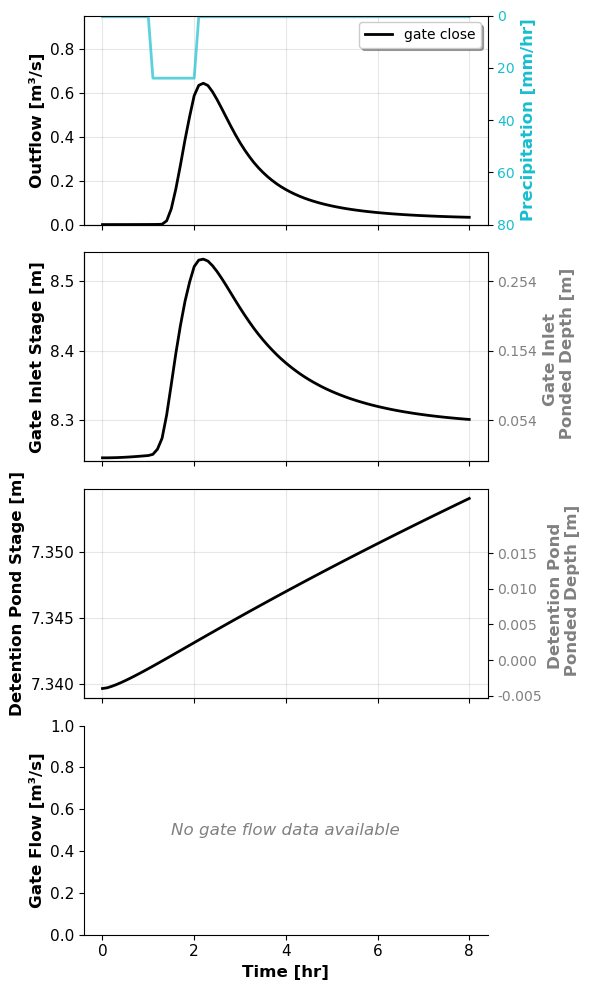

In [42]:
fig, axs = plt.subplots(4, 1, figsize=(6, 10), sharex='col')  
colors = ['black', 'black', 'black', 'black']  
line_styles = ['-', '--', ':']

# Plot outflow for all scenarios
for i, key in enumerate(df.keys()):
    axs[0].plot(df[key]['time [h]'], df[key]['runoff generation [mol s^-1]']/(55000), 
                label=key, color=colors[i], linestyle=line_styles[i], linewidth=2)

axs[0].set_ylabel('Outflow [m³/s]', fontsize=12, fontweight='bold')
axs[0].set_ylim((0, 0.95))
axs[0].legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
axs[0].grid(True, alpha=0.3)

# Add precipitation on twin axis
first_key = list(df.keys())[0]
ax2 = axs[0].twinx()
ax2.plot(df[first_key]['time [h]'], 1000*3600*df[first_key]['precipitation [m s^-1]'], 
         color='#17becf', linewidth=2, alpha=0.7)
ax2.invert_yaxis()
ax2.set_ylim((80, 0))
ax2.set_ylabel('Precipitation [mm/hr]', fontsize=12, fontweight='bold', color='#17becf')
ax2.tick_params(axis='y', labelcolor='#17becf')

# Plot gate intake stage for all scenarios
y_min = min(df[key]['gate intake stage [m]'].min() for key in df.keys()) - 0.005
y_max = max(df[key]['gate intake stage [m]'].max() for key in df.keys()) + 0.01
axs[1].set_ylabel('Gate Inlet Stage [m]', fontsize=12, fontweight='bold')

for i, key in enumerate(df.keys()):
    axs[1].plot(df[key]['time [h]'], df[key]['gate intake stage [m]'], 
                label=key, color=colors[i], linestyle=line_styles[i], linewidth=2)

axs[1].set_ylim(y_min, y_max)
axs[1].grid(True, alpha=0.3)

# Create the second axis for Inlet Head
ax1_twin = axs[1].twinx()
stage_ticks = axs[1].get_yticks()
pd_yticks = stage_ticks - avg_elev_gate  
h_inlet_labels = [f"{tick:.3f}" for tick in pd_yticks]
ax1_twin.set_yticks(stage_ticks)
ax1_twin.set_yticklabels(h_inlet_labels)
ax1_twin.set_ylabel('Gate Inlet \n Ponded Depth [m]', fontsize=12, fontweight='bold', color='gray')
ax1_twin.set_ylim(y_min, y_max)
ax1_twin.tick_params(axis='y', labelcolor='gray')

# Plot detention pond stage for all scenarios
y_min = min(df[key]['detention pond stage [m]'].min() for key in df.keys()) - 0.005
y_max = max(df[key]['detention pond stage [m]'].max() for key in df.keys()) + 0.01
axs[2].set_ylabel('Detention Pond Stage [m]', fontsize=12, fontweight='bold')

for i, key in enumerate(df.keys()):
    axs[2].plot(df[key]['time [h]'], df[key]['detention pond stage [m]'], 
                color=colors[i], linestyle=line_styles[i], linewidth=2)

axs[2].grid(True, alpha=0.3)

# Create the second axis for Detention Pond Head
ax2_twin = axs[2].twinx()
stage_ticks = axs[2].get_yticks()
pd_yticks = stage_ticks - avg_elev_dp  
h_inlet_labels = [f"{tick:.3f}" for tick in pd_yticks]
ax2_twin.set_yticks(stage_ticks)
ax2_twin.set_yticklabels(h_inlet_labels)
ax2_twin.set_ylabel('Detention Pond \n Ponded Depth [m]', fontsize=12, fontweight='bold', color='gray')
ax2_twin.set_ylim(y_min, y_max)
ax2_twin.tick_params(axis='y', labelcolor='gray')

# Plot gate flow (only for scenarios that have gate flow data)
axs[3].set_ylabel('Gate Flow [m³/s]', fontsize=12, fontweight='bold')
has_gate_flow = False
for i, key in enumerate(df.keys()):
    if 'gate flow [mol s^-1]' in df[key].columns:
        axs[3].plot(df[key]['time [h]'], -df[key]['gate flow [mol s^-1]']/55000, 
                    color=colors[i], linestyle=line_styles[i], linewidth=2)
        has_gate_flow = True

if has_gate_flow:
    axs[3].grid(True, alpha=0.3)
else:
    axs[3].text(0.5, 0.5, 'No gate flow data available', 
                transform=axs[3].transAxes, ha='center', va='center', 
                fontsize=12, style='italic', color='gray')

axs[3].set_xlabel('Time [hr]', fontsize=12, fontweight='bold')

# Improve overall appearance
for ax in axs:
    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()

Let's look at the ponded depth fields.

2025-08-29 05:48:39,436 - root - INFO: No unit convertion.


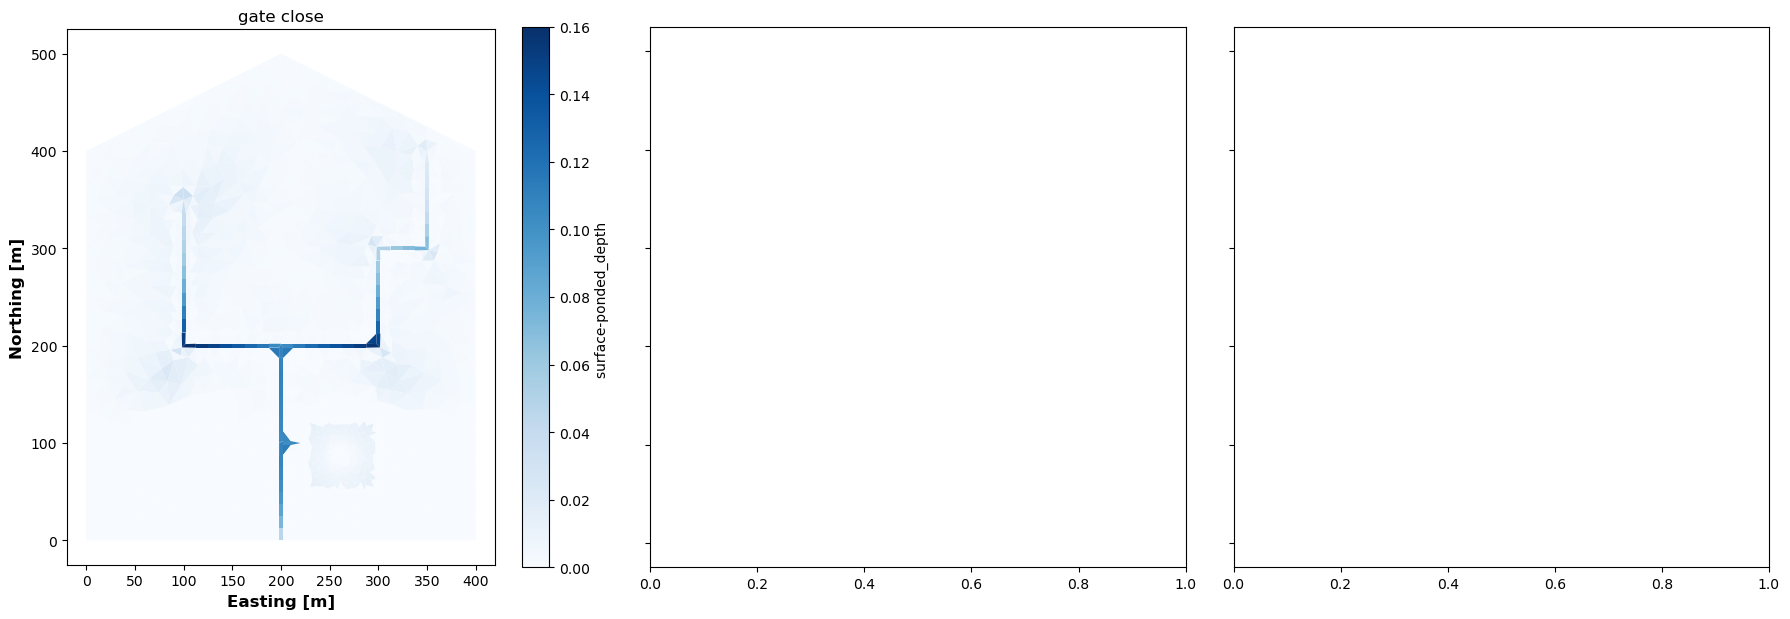

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, (title, path) in zip(axs, dirnames.items()):
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Time [hr]', fontsize=12, fontweight='bold')
    ax.set_ylabel('Gate Flow [m³/s]', fontsize=12, fontweight='bold')
    
    if path in dirnames.values():
        vis_surface = ats_xdmf.VisFile(path, domain='surface', mixed_element=True)
        pv.plot_surface_data(vis_surface, var_name="surface-ponded_depth", 
                                    time_slice=16, mixed_element=True, ax=ax, cmap='Blues', vmin=0, vmax=0.16)
    else:
        ax.text(0.5, 0.5, 'No data available', 
                transform=ax.transAxes, ha='center', va='center', 
                fontsize=12, style='italic', color='k')

    ax.set_title(title)

plt.tight_layout()
plt.show()